In [56]:
from google.colab import files
from IPython.display import Image

In [57]:
uploaded = files.upload()

Saving 03292025.png to 03292025.png


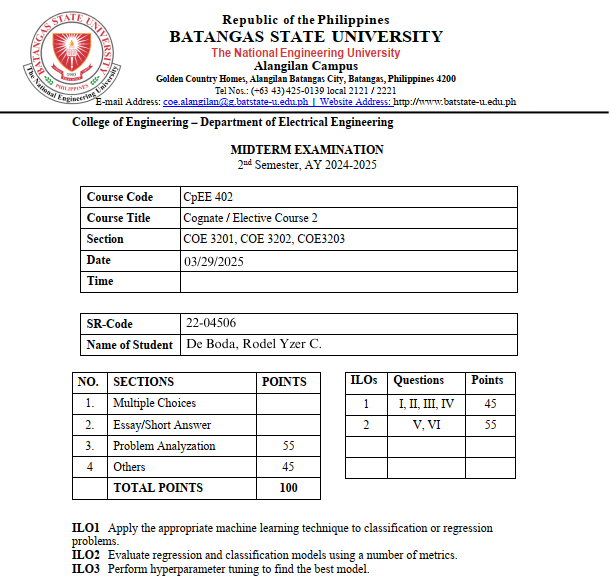

In [60]:
Image('03292025.png', width=525)

**ILO1**	Apply the appropriate machine learning technique to classification or regression problems.
**ILO2**	Evaluate regression and classification models using a number of metrics.
**ILO3**	Perform hyperparameter tuning to find the best model.

General Instructions:
1.	Follow every specified direction carefully.
2.	Complete all necessary data fields in the questionnaire/Python notebook.
3.	Final submission requirements:
a.	Convert your final Python notebook (IPYNB) to PDF format before submission.
b.	Digitally fill up and sign the final PDF submission.
c.	File naming format:
i.	PDF: Surname_MidtermExam.pdf
ii.	IPYNB: Surname_MidtermExam.ipynb
iii.	CSV (if applicable): Surname_Cleaned_MidtermExam.csv
4.	Cheating is strictly prohibited. Any form of cheating in the submitted files will result in a failing grade for this examination.
5.	Video Recording Requirement:
a.	Record a video explaining your midterm exam.
b.	Duration: Minimum 5 minutes, Maximum 10 minutes.
c.	Discuss your approach, code implementation, and results.
d.	Ensure clear audio and screen recording for proper assessment.
6.	Final Submission:
a.	Review your answers thoroughly before submitting.
b.	Submit all required files (PDF, IPYNB, CSV if applicable, and video recording)


# **Student Details**
## **Section**: BSCpE - 3201
## **Date**: 03/27/2025

## **SR-Code**: 22-04506
## **Name of Student**: De Boda, Rodel Yzer C.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# I.	Load the dataset

DATASET DESCRIPTION
Use your approved proposal’s dataset. Define and explain the dataset you will use for regression problem you want to solve include the link of where the public dataset downloaded (Min of 100, Max of 300 Words)


"Dataset Description":

### 1. Read the Data **(5 points)**

In [3]:
df = pd.read_csv('/content/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


### 2.	Get an overview of the dataset and find the summary statistics of the dataset: **(5 points)**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


# II.	Data Cleaning

### 3.	Find the total count and total percentage of missing values in each column of the Data Frame and display them for columns having at least one null value, in descending order of missing percentages. **(5 points)**

In [8]:
df.isnull().sum().sort_values(ascending=False)

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


### 4.	Plot the nullity matrix and nullity correlation heatmap. **(5 points)**

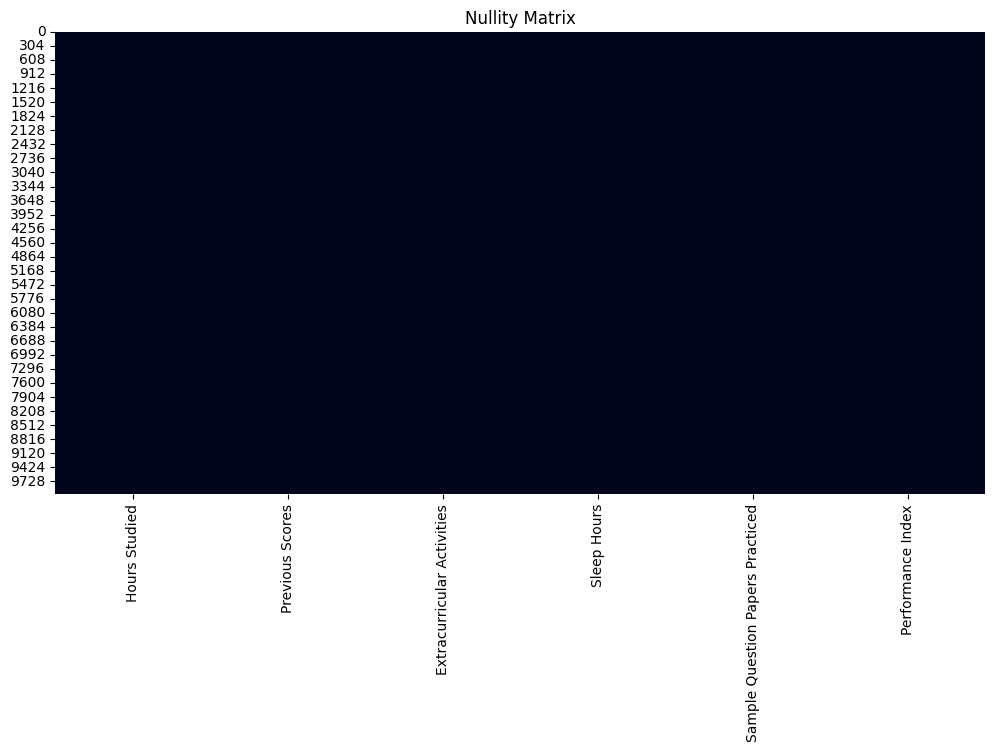

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Nullity Matrix')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


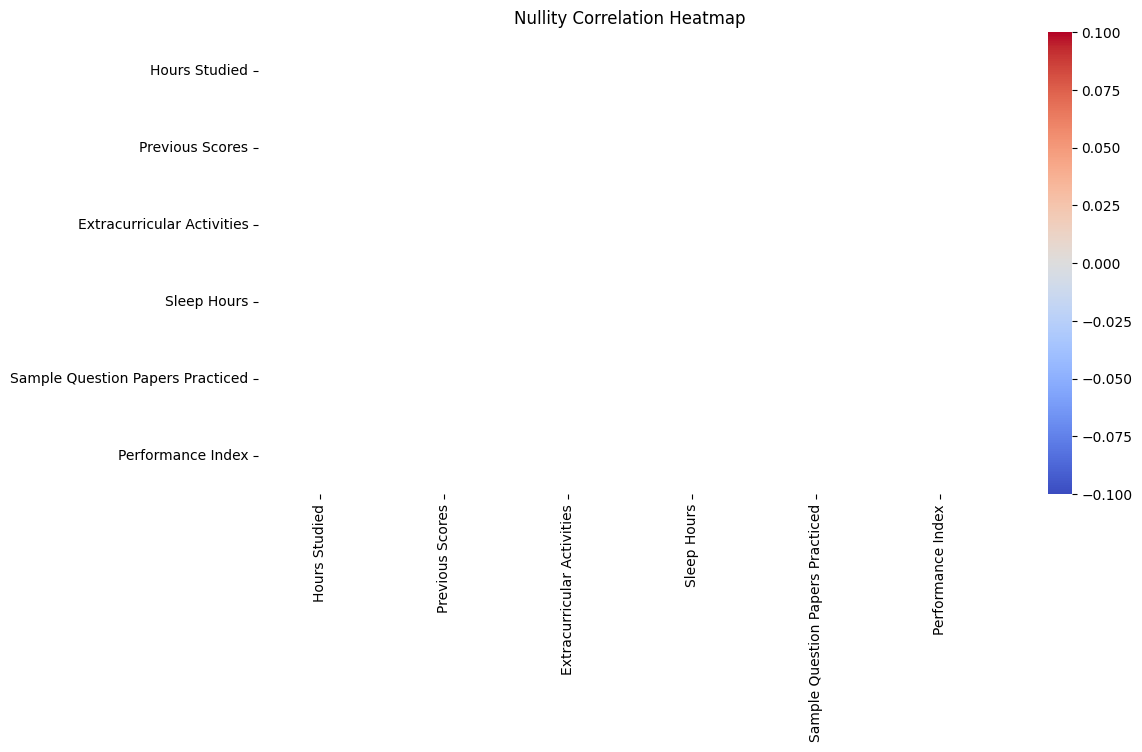

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull().corr(), annot=True, cmap='coolwarm')
plt.title('Nullity Correlation Heatmap')
plt.show()

### 5.	Delete the columns having more than 80% of values missing and unnecessary column. **(5 points)**

In [14]:
columns_to_drop = df.isnull().sum()/len(df) > 0.8
columns_to_drop = columns_to_drop[columns_to_drop].index
df.drop(columns_to_drop, axis=1, inplace=True)

### 6.	Impute null values based from the Summary Statistics. Any statistical values can be used for imputation. **(5 points)**

In [15]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


# III.	DATA VISUALIZATION

### 1.	Provide insights about your data You can use plots to gain insights into your data. **(5 points)**

<Figure size 1200x600 with 0 Axes>

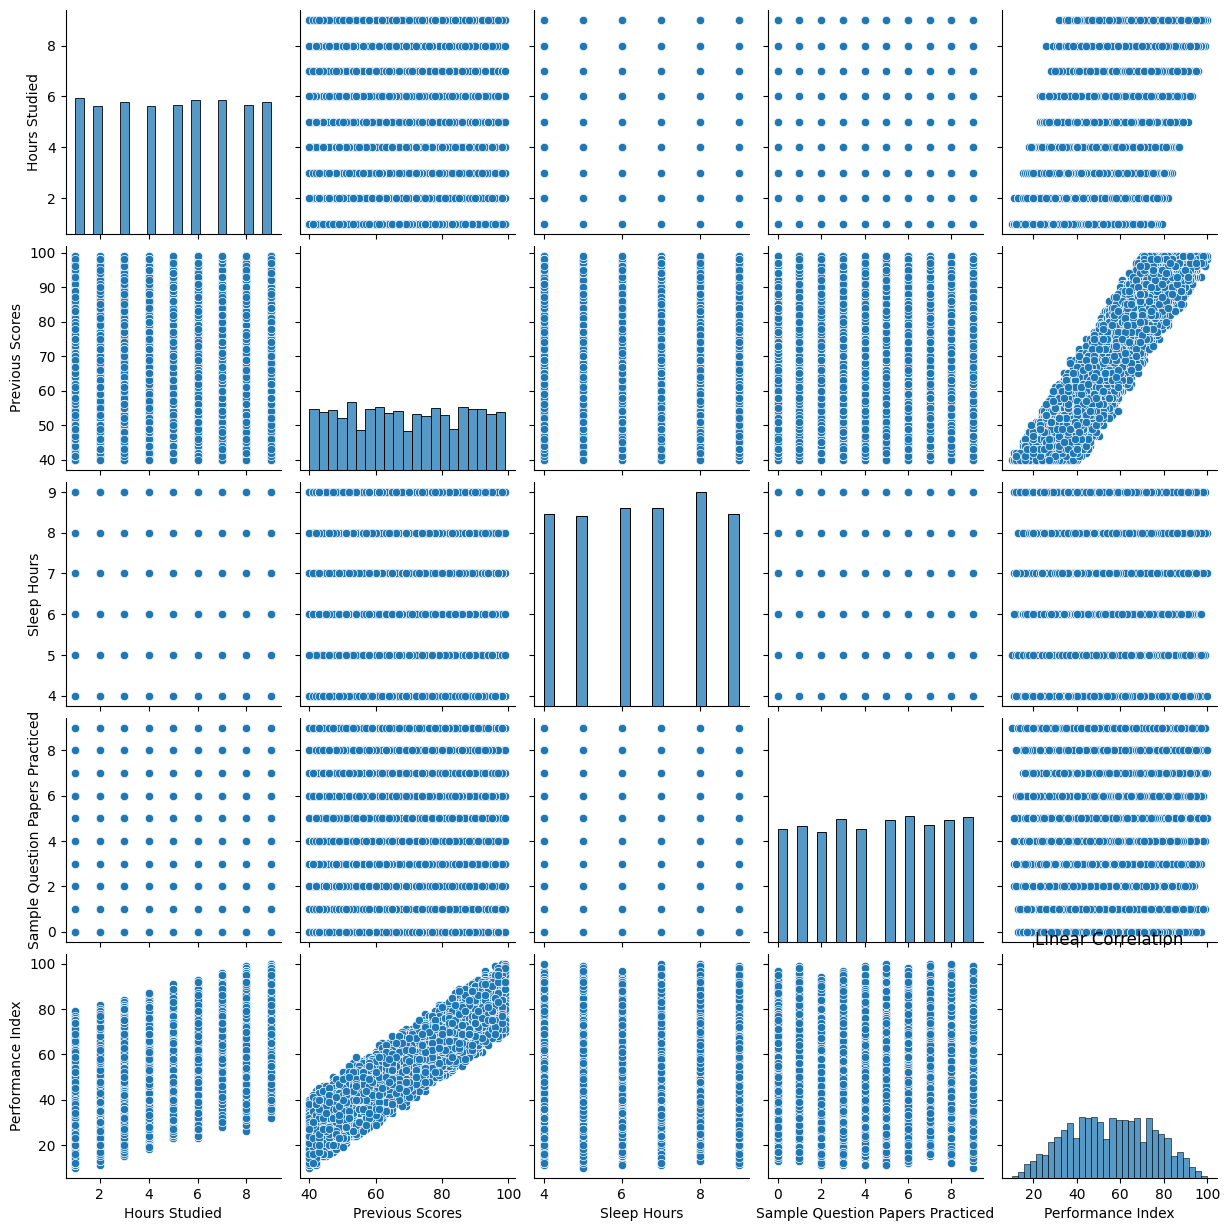

In [17]:
plt.figure(figsize=(12, 6))
sns.pairplot(df)
plt.title('Linear Correlation')
plt.show()

<Figure size 1200x600 with 0 Axes>

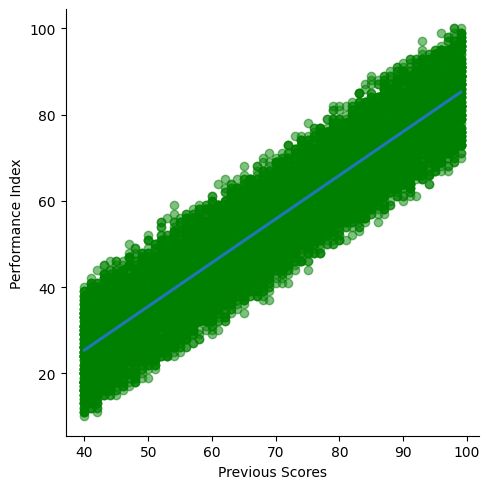

In [20]:
plt.figure(figsize=(12, 6))
sns.lmplot(data=df, x='Previous Scores', y='Performance Index', scatter_kws={'alpha': 0.5, 'color': 'green'})

<Axes: >

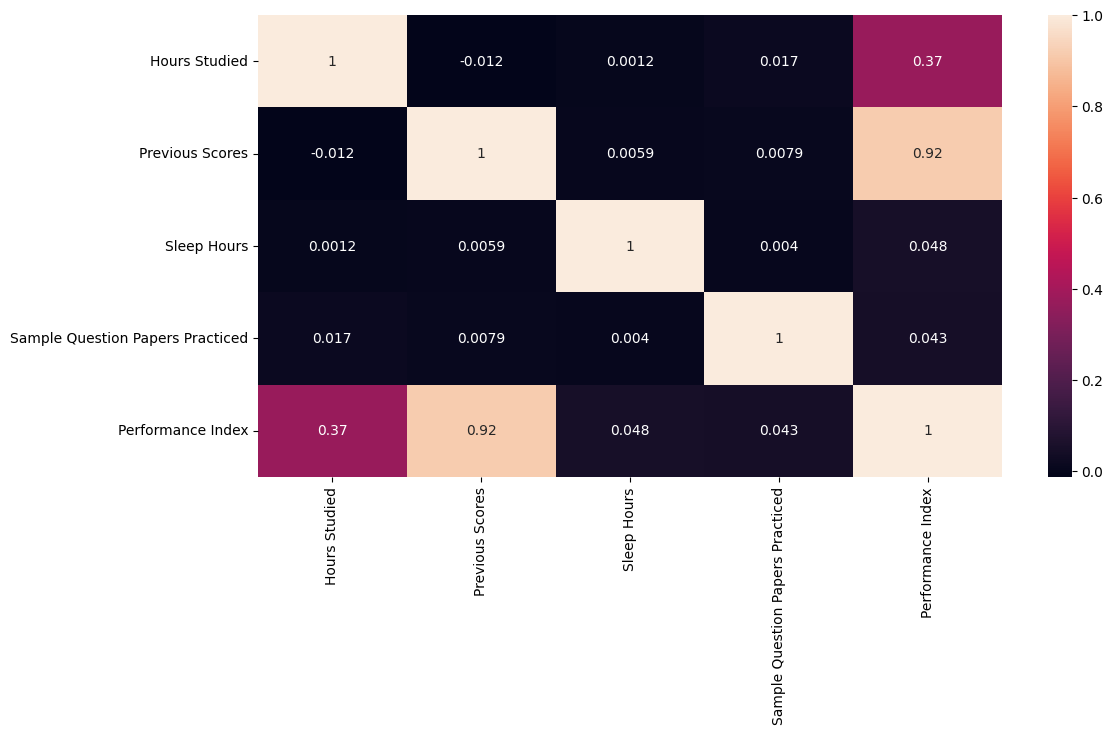

In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

# IV.	Data Preprocessing

### 1.	Choose any feature from your data where you can handle Categorical Variables (5 points)

In [22]:
X = df[['Hours Studied', 'Previous Scores', 'Sleep Hours']]
y = df['Performance Index']

### 2.	Choose any feature from your data where you apply Feature Scaling (5 points

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# V.	Feature Exploration

### 1.	Use any feature exploration techniques to know what are the feature importance from your data. What features are most important for predicting the target variable in the regression problem? (5 points)

In [52]:
coef = pd.DataFrame(model.coef_, df[['Hours Studied', 'Previous Scores', 'Sleep Hours']].columns, columns=['Coefficient'])
coef.sort_values(by='Coefficient', ascending=False)

,Coefficient
Previous Scores,17.632254
Hours Studied,7.400545
Sleep Hours,0.801785


### 2.	Export the Cleaned Dataset. (5 points)

In [53]:
df.to_csv('/content/Student_Performance_cleaned.csv')

# VI.	AI MODELLING – APPLIED REGRESSION ANALYSIS (ARA)

### 1.	Import the required dependencies and read the cleaned data. **(5 points)**

In [26]:
from sklearn.linear_model import LinearRegression

### 2.	Construct a multiple linear regression model. (15 points)


In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([55.51450646, 21.66391324, 47.54084729, ..., 67.71515061,
       54.28797201, 55.08099144])

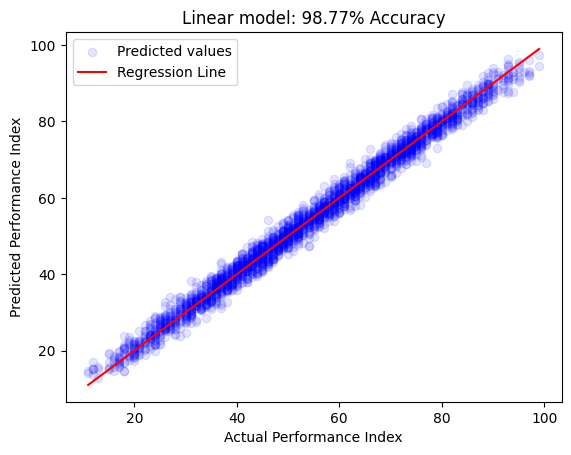

In [55]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.1, label='Predicted values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], label='Regression Line', color='red')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.legend()
plt.title(f'Linear model: {r2*100:.2f}% Accuracy')
plt.show()

### 4.	Compute the performance of the model in terms of the R-squared value and get the Mean Squared Error and Root Mean Squared Error of the model. Target Score: 80% and above. **(25 points)**

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, y_pred)

print('MSE: ', MSE)
print('RMSE: ', RMSE)
print('R-Squared: ', r2)

MSE:  4.514928164666664
RMSE:  2.1248360324191284
R-Squared:  0.9877458140210804


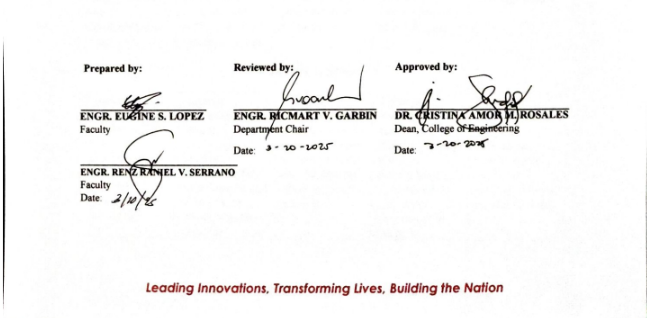